### ポアソン分布とガンマ分布でのベイズ推論

In [1]:
using Distributions
using Plots
using StatsBase
gr()

Plots.GRBackend()

In [18]:
function predict_ab(N, x, a, b)
    x_sum = sum(x)
    a_hat = x_sum + a
    b_hat = N + b
    println("a_hat:", a_hat)
    println("b_hat:", b_hat)
    return a_hat, b_hat
end

predict_ab (generic function with 2 methods)

### 学習

λ:4
a:1
b:2
X:[5, 6, 7, 4, 5, 2, 3, 6, 4, 3, 6, 1, 5, 3, 9, 6, 4, 4, 3, 2, 4, 2, 4, 5, 5, 4, 1, 5, 2, 5, 5, 5, 2, 3, 2, 6, 3, 2, 7, 4, 6, 4, 5, 2, 7, 3, 1, 3, 4, 0, 5, 2, 9, 5, 5, 4, 1, 6, 10, 7, 2, 4, 4, 4, 6, 3, 3, 5, 1, 9, 9, 2, 6, 4, 1, 6, 1, 2, 4, 4, 5, 5, 3, 2, 2, 3, 8, 3, 5, 6]
mean:4.166666666666667
a_hat:46
b_hat:92
a_hat:126
b_hat:92
a_hat:200
b_hat:92
a_hat:295
b_hat:92
a_hat:376
b_hat:92


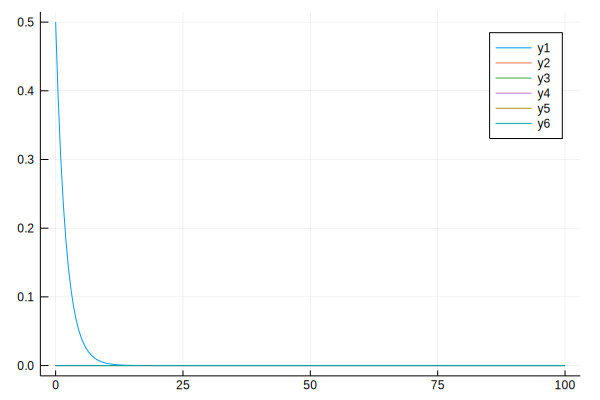

In [24]:
# parameter
lambda = 4
println("λ:", lambda)

# hyperparameter
a = 1
b = 2
println("a:", a)
println("b:", b)

# range
ran = range(0, stop=100, step=0.5)

# data
N = 90
d = Poisson(lambda)
X = rand(d, N)
println("X:", X)
println("mean:", mean(X))

# Gamma Default
d = Gamma(a, b)
y = pdf.(d, ran)
plot(ran, y)

# N=10
a_hat, b_hat = predict_ab(N, X[1:10], a, b)
d = Gamma(a_hat, b_hat)
y = pdf.(d, ran)
plot!(ran, y)

# N=30
a_hat, b_hat = predict_ab(N, X[1:30], a, b)
d = Gamma(a_hat, b_hat)
y = pdf.(d, ran)
plot!(ran, y)

# N=50
a_hat, b_hat = predict_ab(N, X[1:50], a, b)
d = Gamma(a_hat, b_hat)
y = pdf.(d, ran)
plot!(ran, y)

# N=70
a_hat, b_hat = predict_ab(N, X[1:70], a, b)
d = Gamma(a_hat, b_hat)
y = pdf.(d, ran)
plot!(ran, y)

# N=90
a_hat, b_hat = predict_ab(N, X[1:90], a, b)
d = Gamma(a_hat, b_hat)
y = pdf.(d, ran)
plot!(ran, y)

### 予測

r:376
p:0.010752688172043012
〈X_predict〉:4.08695652173913
X:[35071, 34452, 34291, 34276, 32853, 35554, 32872, 34710, 35267, 31421, 31308, 33968, 35468, 33667, 34746, 34585, 32810, 37341, 33372, 36789, 32463, 36471, 34650, 33687, 32372, 34168, 32610, 37412, 33922, 32930, 35916, 35307, 32571, 35035, 31736, 32895, 34761, 35066, 35505, 37907, 35112, 32286, 30190, 32065, 37896, 32120, 32643, 33011, 36301, 35298, 33853, 32657, 37177, 35614, 35425, 33401, 34559, 33115, 35666, 35915, 32277, 35437, 36797, 31692, 35299, 34535, 37365, 33376, 34461, 30026, 34850, 32422, 32945, 36302, 32461, 33426, 35269, 36364, 32733, 37393, 35687, 35604, 30307, 35830, 33373, 37398, 35322, 35682, 38930, 32670]
mean:34363.8


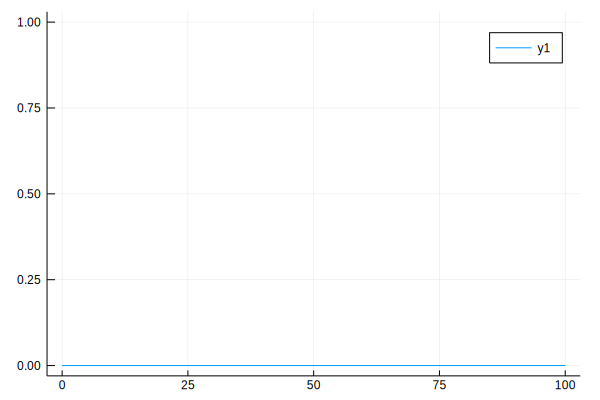

In [30]:
r = a_hat
p = 1 / (b_hat + 1)
println("r:", r)
println("p:", p)

d = NegativeBinomial(r, p)
println("〈X_predict〉:", p*r/(1-p))

X_predict = rand(d, N)
println("X:", X_predict)
println("mean:", mean(X_predict))

y = pdf.(d, ran)
plot(ran, y)